# Experimento: Classificador para viagens

## Acesso e análise dos dados

Vamos utilizar a biblioteca https://pandas.pydata.org/ para manipulação dos dados.

In [53]:
import pandas as pd

A função __[pd.read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)__ Retorna um Dataframe para manipulação dos dados.

In [54]:
dataset = pd.read_csv('viagem.csv'); 
dataset

,aparencia,temperatura,umidade,ventando,viajar
0,sol,25,72,sim,va
1,sol,28,91,sim,Nao-va
2,sol,22,70,nao,va
3,sol,23,95,nao,Nao-va
4,sol,30,85,nao,Nao-va
5,nublado,23,90,sim,va
6,nublado,29,78,nao,va
7,nublado,19,65,sim,Nao-va
8,nublado,26,75,nao,va
9,nublado,20,87,sim,va


<br>
Veja como os dados carregados foram interpretados ...

In [55]:
dataset.dtypes

aparencia      object
temperatura     int64
umidade         int64
ventando       object
viajar         object
dtype: object

<br>
Uma primeira análise dos dados númericos, como contagem, desvio padrão, entre outros. Apenas os atributos numéricos fazem parte dessa descrição. Lembre que a notação é Americana, portanto o ponto representa vírgula.

In [56]:
dataset.describe()

,temperatura,umidade
count,15.000000,15.000000
mean,23.666667,80.933333
std,3.457222,9.452639
min,19.000000,65.000000
25%,21.500000,73.500000
50%,23.000000,80.000000
75%,25.500000,88.500000
max,30.000000,95.000000


<br>
Se for necessário, é possível analisar apenas um dos atributos.

In [57]:
dataset['temperatura'].mean()

np.float64(23.666666666666668)

<br>
Boxplot gerado com base nos dados numéricos do dataset: temperatura e humidade.<br>As colunas dividem os valores em Quartis (P25 = 25%, P50 = 50%, P75 = 75%)

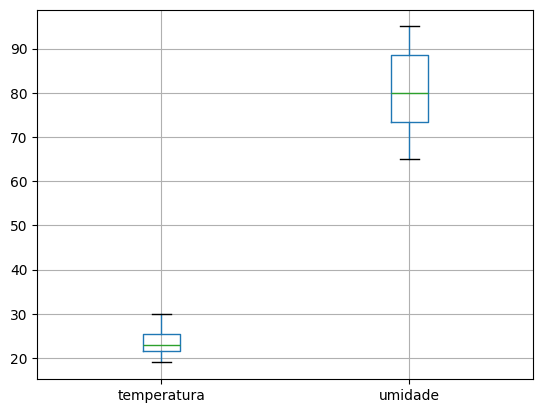

In [58]:
import matplotlib.pyplot as plt
dataset.boxplot()
plt.show()

## Pré-processamento

### Enconding
Alguns classificadores não aceitam features com valores nominais, então é necessário fazer o enconding em valores binários.
É o caso do classificador que será empregado mais adiante.<br>
__[pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)__ converte variáveis categóricas em variáveis binárias. O atributo ***drop_first=True*** produz apenas uma serie / coluna para atributos que possuem apenas dois valores.

In [59]:
one_hot_dataset = pd.get_dummies(dataset,drop_first=True)
one_hot_dataset

,temperatura,umidade,aparencia_nublado,aparencia_sol,ventando_sim,viajar_va
0,25,72,False,True,True,True
1,28,91,False,True,True,False
2,22,70,False,True,False,True
3,23,95,False,True,False,False
4,30,85,False,True,False,False
5,23,90,True,False,True,True
6,29,78,True,False,False,True
7,19,65,True,False,True,False
8,26,75,True,False,False,True
9,20,87,True,False,True,True


<br>
<i>X<i> representa exemplos de casos (dias) e seus atributos, mas removendo o atributo classe.

In [60]:
X = one_hot_dataset[one_hot_dataset.columns[:5]] 
X

,temperatura,umidade,aparencia_nublado,aparencia_sol,ventando_sim
0,25,72,False,True,True
1,28,91,False,True,True
2,22,70,False,True,False
3,23,95,False,True,False
4,30,85,False,True,False
5,23,90,True,False,True
6,29,78,True,False,False
7,19,65,True,False,True
8,26,75,True,False,False
9,20,87,True,False,True


<br><i>y</i> representa a série dos valores classe de cada exemplo.

In [61]:
y = one_hot_dataset['viajar_va'] 
y

0      True
1     False
2      True
3     False
4     False
5      True
6      True
7     False
8      True
9      True
10     True
11    False
12    False
13     True
14     True
Name: viajar_va, dtype: bool

### Separação em Treino e Teste
A função __[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)__ extrai um conjunto aleatório de 70% para treino and 30% para teste.  
Uma questão interessante é utilizar o parâmetro *random_state* com um valor fixo inteiro, como por exemplo __[42](https://en.wikipedia.org/wiki/Phrases_from_The_Hitchhiker%27s_Guide_to_the_Galaxy#The_Answer_to_the_Ultimate_Question_of_Life,_the_Universe,_and_Everything_is_42)__. Desta forma, durante o desenvolvimento, a saída do split será sempre a mesma, de forma que é possível avaliar o pipe e seus resultados de forma contínua com os mesmos dados. Quando o pipe estiver em produção, trocamos o parâmetro *random_state* para *None*.   

In [62]:
# Importando biblioteca de separação de treino / teste
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42) 

In [63]:
X_train

,temperatura,umidade,aparencia_nublado,aparencia_sol,ventando_sim
8,26,75,True,False,False
2,22,70,False,True,False
1,28,91,False,True,True
14,21,80,False,False,False
4,30,85,False,True,False
7,19,65,True,False,True
10,22,95,False,False,False
12,23,80,False,False,True
3,23,95,False,True,False
6,29,78,True,False,False


## Processamento

### Treinamento
Este treinamento produz um modelo de classificador supervisionado baseado no algoritmo de Árvore de Decisão.  
Um exemplo complementar da biblioteca scikit-learn pode ser encontrado em https://scikit-learn.org/stable/modules/tree.html#classification

In [64]:
from sklearn.tree import DecisionTreeClassifier # Importando classificador
# Cria o objeto de um classificador de Árvores de Decisão
clf = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=1)
# Executa o treinamento (fit)
clf = clf.fit(X_train,y_train)

Como resultado do aprendizado, obtemos a seguinte árvore:

In [65]:
from sklearn import tree
tree.plot_tree(clf,rounded=True,feature_names=X.columns,fontsize=6,class_names=['va','nao_va'],proportion=True, impurity=False, filled=True, label='all')

[Text(0.6, 0.875, 'ventando_sim <= 0.5\nsamples = 100.0%\nvalue = [0.5, 0.5]\nclass = va'),
 Text(0.4, 0.625, 'aparencia_sol <= 0.5\nsamples = 70.0%\nvalue = [0.286, 0.714]\nclass = nao_va'),
 Text(0.5, 0.75, 'True  '),
 Text(0.2, 0.375, 'samples = 40.0%\nvalue = [0.0, 1.0]\nclass = nao_va'),
 Text(0.6, 0.375, 'umidade <= 77.5\nsamples = 30.0%\nvalue = [0.667, 0.333]\nclass = va'),
 Text(0.4, 0.125, 'samples = 10.0%\nvalue = [0.0, 1.0]\nclass = nao_va'),
 Text(0.8, 0.125, 'samples = 20.0%\nvalue = [1.0, 0.0]\nclass = va'),
 Text(0.8, 0.625, 'samples = 30.0%\nvalue = [1.0, 0.0]\nclass = va'),
 Text(0.7, 0.75, '  False')]

### Teste

In [66]:
# Faz a predição dos valores para teste
y_pred = clf.predict(X_test)
X_test,y_pred

(    temperatura  umidade  aparencia_nublado  aparencia_sol  ventando_sim
 9            20       87               True          False          True
 11           19       70              False          False          True
 0            25       72              False           True          True
 13           25       81              False          False         False
 5            23       90               True          False          True,
 array([False, False, False,  True, False]))

## Avaliação
*** 

**tp** (verdadeiros positivos): casos cassificados parar uma classe corretamente<br>
**fp** (falsos positivos): casos classificados para uma classe incorretamente<br>
**tn** (verdadeiros negativos): casos classificados corretamente como falsos<br>
**fn** (falsos negativos): casos considerados de outra classe mas deveriam ser da classe em questão<br>
<br>
**Suporte**: tp + fp, ou seja, o total de casos</br>
**Precisão**: tp / (tp + fp), ou seja, proporção dos acertos em classificar exemplos positivos <br>
**Recall**: tp / (tp + fn), ou seja, proporção de acertos entre todas as classes<br>
**f1-score**: média harmônica entre a Precisão e o Recall<br>
**Acurácia**: soma do tp de todas as classes dividido pelo número de instâncias do dataset de teste (resulta em uma percentagem).<br>

Uma ótima imagem ilustrativa sobre estas métricas pode ser encontrada na __[Wikipédia](https://pt.wikipedia.org/wiki/Precis%C3%A3o_e_revoca%C3%A7%C3%A3o#/media/Ficheiro:Precis%C3%A3o_e_revoca%C3%A7%C3%A3o.png)__


In [67]:
from sklearn import metrics #Importando módulo de métricas para avaliação
# Acurácia do modelo, o quanto o classificador está correto?
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.4


In [68]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print(classification_report(y_test, y_pred, target_names=['va','nao_va']))                                                                              

              precision    recall  f1-score   support

          va       0.25      1.00      0.40         1
      nao_va       1.00      0.25      0.40         4

    accuracy                           0.40         5
   macro avg       0.62      0.62      0.40         5
weighted avg       0.85      0.40      0.40         5



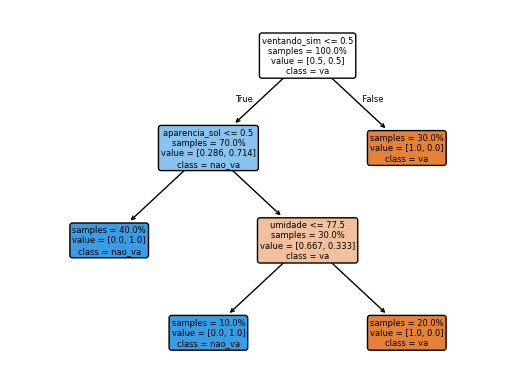

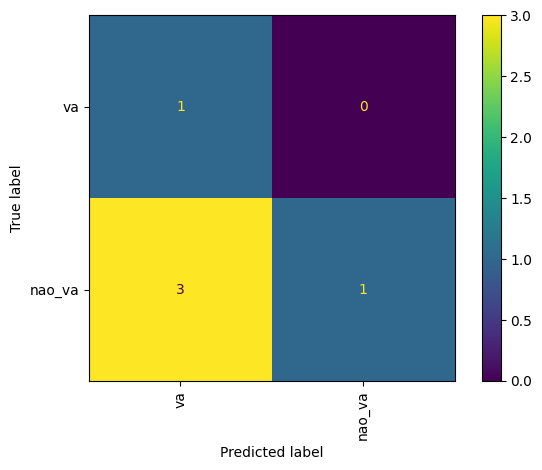

In [69]:
ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test, display_labels=['va','nao_va'], xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()